## Rješenja zadataka iz predmeta Akvizicija i obrada eksperimentalnih podataka
#### Novembar 2018

### ZADATAK 1
Koristeći Newtonov metod naći korjen jednačine $x^4-2x^3+5x^2-6=0$ na intervalu [1,2]. Newtonov metod koristi rekurzivnu formulu $x_{n+1}=x_n-\frac{f\left(x_n\right)}{f'\left(x_n\right)}$, gdje se u prvoj iteraciji n=1 uzima neki proizvoljan broj iz zadatog intervala. Uporediti dobijene vrijednosti za 3, 5 i 50 iteracija do na 15. decimalu (prikazati u tabeli). Nacrtati funkciju u datom intervalu.

Unijeti broj iteracija: 5
Unijeti pocetnu vrijednost x: 1.1
1.21756215475076


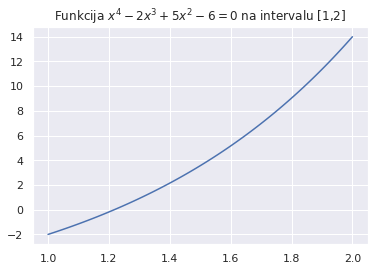

In [89]:
import numpy as np
import matplotlib.pyplot as plt


def funkcija(x):
    return x**4-2*x**3+5*x**2-6

def fprime(x):
    return 4*x**3-6*x**2+10*x
    
n=input('Unijeti broj iteracija: ')
x0=input('Unijeti pocetnu vrijednost x: ')

x0=float(x0)
n=int(n)

for k in range (0,n):
    x=x0-funkcija(x0)/fprime(x0)
    x0=x

print(x)

x=np.linspace(1,2,100)

import seaborn as sns
sns.set()
plt.plot(x,funkcija(x))
plt.title('Funkcija $x^4-2x^3+5x^2-6=0$ na intervalu [1,2]')
plt.show()

### Zadatak 3 
Napisati program koji učitava matricu kolonu X, a zatim izračunava standardnu devijaciju učitane matrice. Ispisati vrijednost standardne devijacije pozivom na funkciju. Standardna devijacija se računa prema formuli $\sigma=\sqrt{\frac{1}{N-1}\Sigma_i\left(x_i-\overline{x}\right)^2}$, gdje je N  broj elemenata matrice, a $\overline{x}$ srednja vrijednost svih elemenata.

In [28]:
import numpy as np

N=int(input('Broj clanova niza '))
A=np.zeros(N)
Sum=0.

for k in range(0,N):
    A[k]=input('Unesi element niza ')
    Sum=Sum+A[k]   #Suma elemenata niza

xbar=Sum/N  #Srednja vrijednost

Sum_i=0. #Suma ispod korijena
for j in range(0,N):
    Sum_i=Sum_i+(A[j]-xbar)**2

std_dev=np.sqrt(1./(N-1)*Sum_i)  #Standardna devijacija

print('Standardna devijacija niza elemenata ',A, ' je jednaka ',std_dev)

Broj clanova niza 5
Unesi element niza 1
Unesi element niza 2
Unesi element niza 3
Unesi element niza 4
Unesi element niza 5
Standardna devijacija niza elemenata  [1. 2. 3. 4. 5.]  je jednaka  1.5811388300841898


### Zadatak 4
Korištenjem operatora dvotačka definisati vremenski interval od 0 do 15 sekundi sa korakom 0.05 sekundi, a zatim u tom intervalu na jednom grafu nacrtati funkcije  $x\left(t\right)=\cos\left(2\pi ft\right)$  i $v\left(t\right)=-2\pi f\sin\ \left(2\pi ft\right)$. Uzeti da je f=0.2 Hz. Obavezno napisati naziv grafa ("Zavisnost elongacije i brzine od vremena") i označiti na grafu pripadnost linija odgovarajućim funkcijama, te nacrtati gridlines.

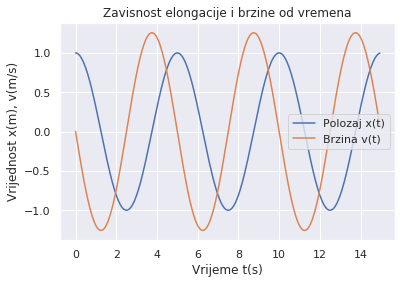

In [88]:
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(0,15,0.05)
f=0.2
omega=2*np.pi*f
x=np.cos(omega*t)
v=-omega*np.sin(omega*t)

plt.plot(t,x,label='Polozaj x(t)')
plt.plot(t,v,label='Brzina v(t)')
plt.legend()
plt.title('Zavisnost elongacije i brzine od vremena')
plt.xlabel('Vrijeme t(s)')
plt.ylabel('Vrijednost x(m), v(m/s)')

plt.show()


### Zadatak 5
Napisati skriptu koja učitava vrijednost temperature u stepenima celzijusa, a zatim nudi korisniku da pritiskom na F (Farenheit) ili K (Kelvin) prikaže vrijednost temperature u odabranoj skali $\left(F=\frac{9}{5}C+32\right)$,$\left(K=C+273.15\right)$.

In [50]:
import numpy as np

print('Program za konverziju °C u Kelvin ili Fahrenheit')
C=float(input('Unesi temperaturu u Celzijusima '))

izbor=input('Odaberi K za Kelvin, F za Fahrenheit ')
izbor=izbor.upper() #ako korisnik unese malo slovo

K=C+273.15; F=9/5*C+32

if izbor=='K':
    print('Temperatura od ',C,' °C odgovara ',K,' Kelvina')
elif izbor == 'F':
    print('Temperatura od ',C,' °C odgovara ',F,' Fahrenheita')
else:
    print('Nepravilan izbor znaka za konverziju')
    


Program za konverziju °C u Kelvin ili Fahrenheit
Unesi temperaturu u Celzijusima76.3
Odaberi K za Kelvin, F za Fahrenheit k
Temperatura od  76.3  °C odgovara  349.45  Kelvina


### Zadatak 2
U nekom fizičkom eksperimentu je mjerena zavisnost  fizičke veličine Y od druge fizičke veličine X. Rezultati mjerenja su snimljeni u datoteci rezultati_mjerenja.csv. Učitati podatke i izvršiti fit metodom najmanjih kvadrata (linearna metoda). Rješenje prikazati na grafikonu (podaci, dobijena prava i navesti vrijednosti koeficijenata). 


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('rezultati_mjerenja.csv', header=None)

In [57]:
data.head()

,0,1
0,5.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


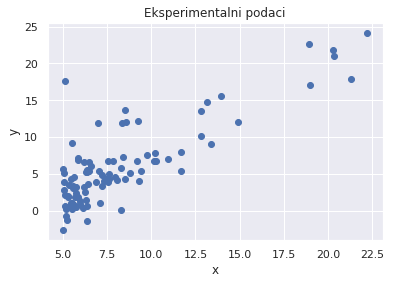

In [91]:
x=data[0]; y=data[1]
plt.scatter(x,y)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Eksperimentalni podaci')
plt.show()

Linearna regresija:
$y=ax+b$ gdje je 
$a=\dfrac{\Sigma_i^N (x_i-\bar{x})(y_i-\bar{y})}{\Sigma_i^N (x_i-\bar{x})^2}$ i $b=\bar{y}-a\bar{x}.$

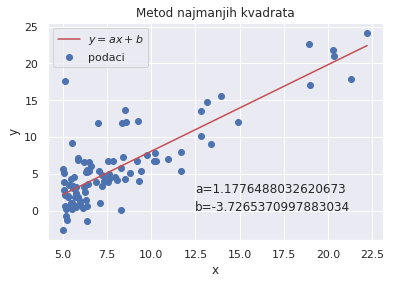

In [99]:
N=len(x)

xbar= np.mean(x); ybar=np.mean(y)
USum=0.; DSum=0.
for k in range (0,N):
    USum+=(x[k]-xbar)*(y[k]-ybar)
    DSum+=(x[k]-xbar)**2
    
a=USum/DSum; b=ybar-a*xbar

xfit=np.linspace(min(x),max(x),100)
yfit=a*xfit+b

import seaborn as sns
sns.set()
plt.scatter(x,y,label='podaci')
plt.plot(xfit,yfit,'r',label='$y=ax+b$')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Metod najmanjih kvadrata')
plt.legend()
plt.annotate('a='+str(a),(12.5,2.5))
plt.annotate('b='+str(b),(12.5,0))
plt.show()